In [20]:
# Load data science packages
import numpy as np
import pandas as pd

# Load argument packages
import argparse
import re

# Load chemistry packages
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from rdkit.Chem import PandasTools
from rdkit import RDLogger                                                                                                                                                               

RDLogger.DisableLog('rdApp.*')
PandasTools.RenderImagesInAllDataFrames(images=True)

# Load visualization package and display settings
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

IPythonConsole.molSize = (1000, 300)   # Change image size
IPythonConsole.ipython_useSVG = False  # Show as PNG

In [21]:
# With reagents
reacWreag_acc_1 = np.array([70.2, 69.8, 70.4, 70.4, 70.6])
reacWreag_acc_1_atleast1 = np.array([82.0, 82.2, 82.2, 82.2, 82.3])

# Without reagents
reacWOreag_acc_1 = np.array([54.1, 54.8, 55.2, 55.3, 55.7])
reacWOreag_acc_1_atleast1 = np.array([67.3, 67.7, 68.1, 68.1, 68.5])

# Data size
dataset_size = np.array([1, 2, 3, 4, 5])

In [22]:
# Round trip with reagents
reacWreag_acc_1_rt = np.array([89.7, 90.5, 89.0, 89.0, 89.2])
reacWreag_acc_1_atleast1_rt = np.array([90.0, 90.7, 89.2, 89.2 , 89.4])

# Round trip without reagents
reacWOreag_acc_1_rt = np.array([82.2, 82.7, 82.3, 82.1, 81.8])
reacWOreag_acc_1_atleast1_rt = np.array([82.5, 83.0, 82.5, 82.3, 82.1])

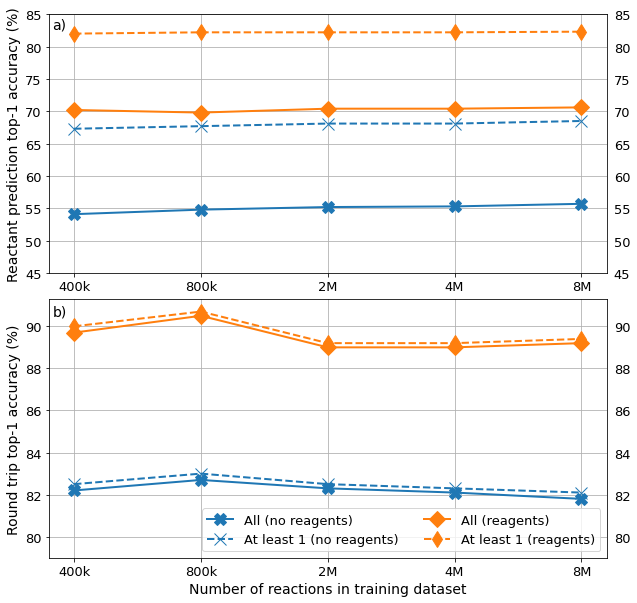

In [23]:
# Figure 1. Correcly-predicted reagents per reaction
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(2, 1, hspace=0.1)
ax = fig.add_subplot(gs[0, 0])
WO = ax.plot(dataset_size, reacWOreag_acc_1, 'C0', lw=2, marker='X', markersize=12, label='All (no reagents)')
WO_1 = ax.plot(dataset_size, reacWOreag_acc_1_atleast1, 'C0', linestyle='--', lw=2, marker='x', markersize=12, label='At least 1 (no reagents)')
W = ax.plot(dataset_size, reacWreag_acc_1, 'C1', lw=2, marker='D', markersize=12, label='All (reagents)')
W_1 = ax.plot(dataset_size, reacWreag_acc_1_atleast1, 'C1', linestyle='--', lw=2, marker='d', markersize=12, label='At least 1 (reagents)')

ax.set_ylabel('Reactant prediction top-1 accuracy (%)', fontsize=14)
ax.set_xticks(dataset_size)
ax.set_ylim(45, 85)
ax.set_xticklabels(['400k', '800k', '2M', '4M', '8M'])
# ax.set_yticks(np.linspace(.5,11.5,12))
# ax.set_yticklabels([1,2,3,4,5,6,7,8,9,10,11,12])
ax.tick_params(labelsize=13, labelright=True)
ax.grid()
ax.text(.83,82.8, 'a)', fontsize=14)

ax2 = fig.add_subplot(gs[1, 0])
WO = ax2.plot(dataset_size, reacWOreag_acc_1_rt, 'C0', lw=2, marker='X', markersize=12, label='All (no reagents)')
WO_1 = ax2.plot(dataset_size, reacWOreag_acc_1_atleast1_rt, 'C0', linestyle='--', lw=2, marker='x', markersize=12, label='At least 1 (no reagents)')
W = ax2.plot(dataset_size, reacWreag_acc_1_rt, 'C1', lw=2, marker='D', markersize=12, label='All (reagents)')
W_1 = ax2.plot(dataset_size, reacWreag_acc_1_atleast1_rt, 'C1', linestyle='--', lw=2, marker='d', markersize=12, label='At least 1 (reagents)')

ax2.set_xlabel('Number of reactions in training dataset', fontsize=14)
ax2.set_ylabel('Round trip top-1 accuracy (%)', fontsize=14)
ax2.set_xticks(dataset_size)
ax2.set_ylim(79, 91.3)
ax2.set_xticklabels(['400k', '800k', '2M', '4M', '8M'])
# ax2.set_yticks(np.linspace(.5,11.5,12))
# ax2.set_yticklabels([1,2,3,4,5,6,7,8,9,10,11,12])
ax2.tick_params(labelsize=13, labelright=True)
ax2.grid()
ax2.text(.83,90.5, 'b)', fontsize=14)

plt.legend(loc=4, fontsize=13, ncol=2)

plt.savefig('../figs/fig3.pdf', dpi=300, bbox_inches='tight')
plt.savefig('../figs/fig3.png', dpi=300, bbox_inches='tight')

plt.show()